In [1]:
import pandasai as pai
from pandasai_openai.openai import OpenAI
from pandasai_local import LocalLLM


D:\Python\envs\pandasai\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
llm1 = OpenAI(
    #os.getenv("OPENAI_API_KEY")
    model="gpt-4.1-nano"
)

llm = LocalLLM(
    # lmstudio
    # api_base="http://localhost:1234/v1",

    # ollama
    api_base="http://localhost:11434/v1",
    # model="mistral"             # OK
    # model="mistral-nemo"        # OK
    # model="mistral-small:22b"   # OK
    # model="phi4"                # OK
    model="gemma3:12b"          # -- NO
    # model="phi4-reasoning"      # -- NO: too time
    # model="qwen3:14b"           # OK: a lot of time
    # model="magistral"           # -- NO: too time
    # model="deepseek-r1:14b"     # OK: a lot of time
    # model="granite3.3"          # - NO: not a number
    # model="falcon3:10b"         # OK, may be
)

pai.config.set({
    "llm": llm,
    "verbose": False
})


In [3]:
# Sample DataFrame
df = pai.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "revenue": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})

In [4]:
df.chat('Which are the top 5 countries by sales?').value

,country,revenue
0,China,7000
1,United States,5000
2,Japan,4500
3,Germany,4100
4,United Kingdom,3200


In [5]:
pai.chat('Which are the top 5 countries by sales?', *[df]).value

,country,revenue
0,China,7000
1,United States,5000
2,Japan,4500
3,Germany,4100
4,United Kingdom,3200


In [6]:
df.chat(
    "What is the total sales for the top 3 countries by sales?"
).value

16500.0

In [12]:
pai.chat("What is the total sales for the top 3 countries by sales?", df).value

16500.0

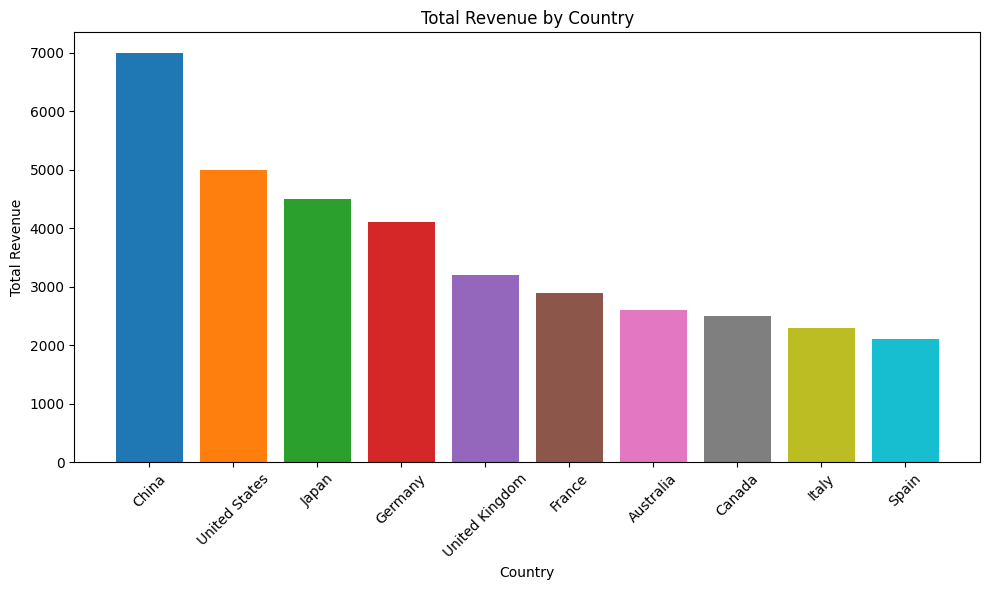

In [13]:
im = pai.chat( "Plot the histogram of countries showing for each one the gd. Use different colors for each bar", *[df])

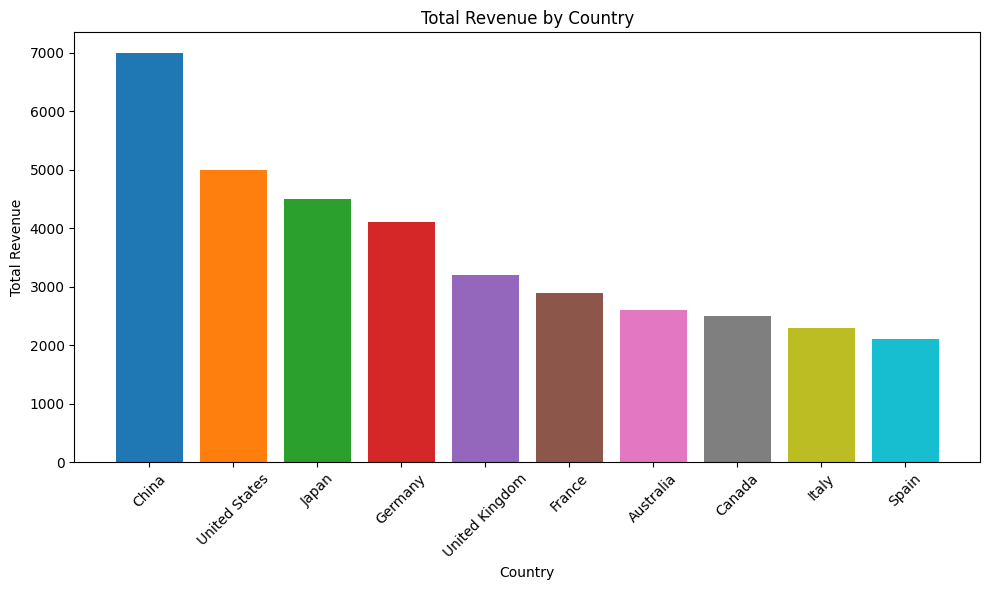

In [8]:
im = df.chat(
    "Plot the histogram of countries showing for each one the gd. Use different colors for each bar",
).value

In [9]:
employees_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Emma', 'Liam', 'Olivia', 'William'],
    'Department': ['HR', 'Sales', 'IT', 'Marketing', 'Finance']
}

salaries_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Salary': [5000, 6000, 4500, 7000, 5500]
}
employees_df = pai.DataFrame(employees_data)
salaries_df = pai.DataFrame(salaries_data)


In [10]:
pai.chat("Who gets paid the most?", employees_df, salaries_df).value

'The highest paid employee is Olivia with a salary of 7000.'

In [ ]:
df = pai.read_csv("./adult.csv")

In [ ]:
df.chat("How may rows are there?").value

In [ ]:
df=pai.read_csv("./titanic_train.csv")

In [ ]:
df.chat("how many rows are there?").value

In [ ]:
df.chat("Plot the pie chart of the ages in intervals of 10 years").value